**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import tweepy
import seaborn as sns
import requests
import json
import os
import datetime
from scipy import stats
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from timeit import default_timer as timer

<h1>gathering data</h1>

In [22]:
#load the manually downloaded file into a pandas dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
df_list = []

with open('tweet_json', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_api = pd.DataFrame(df_list)
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [11]:
import requests as rq
download = rq.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")#downloading the file
csv_file = open('image_predictions.csv', 'wb') 
csv_file.write(download.content)
csv_file.close()

In [12]:
df_pred = pd.read_csv("image_predictions.csv",sep='\t')

In [23]:
df_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<h1>data assessing</h1>

In [25]:
print(df_archive.duplicated().any()) 
print(df_archive['tweet_id'].duplicated().any()) 

False
False


In [26]:
df_api.duplicated().value_counts() #no duplicates

False    2354
dtype: int64

In [27]:
print(df_pred.duplicated().any())
print(df_pred.jpg_url.duplicated().any())

False
True


In [28]:
df_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg    2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
                                                  ..
https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg    1
https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg    1
https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg    1
https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg    1
https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [29]:
print(df_pred.jpg_url.duplicated().value_counts())

False    2009
True       66
Name: jpg_url, dtype: int64


In [32]:
dupl_index = df_pred.jpg_url.duplicated()
df_pred[dupl_index]['tweet_id']
df_archive.loc[df_archive['tweet_id']==752309394570878976].text

949    RT @dog_rates: Everyone needs to watch this. 1...
Name: text, dtype: object

In [33]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
df_pred[['p1','p2','p3']].sample(10)

,p1,p2,p3
1406,Boston_bull,American_Staffordshire_terrier,Staffordshire_bullterrier
33,llama,Irish_terrier,dingo
476,paper_towel,mailbox,seat_belt
1371,African_grey,Madagascar_cat,television
1171,cup,toy_poodle,consomme
1645,cocker_spaniel,Dandie_Dinmont,English_setter
1325,golden_retriever,Labrador_retriever,Border_terrier
1641,Chihuahua,Pomeranian,toy_terrier
1438,Eskimo_dog,Siberian_husky,Saluki
1492,seat_belt,golden_retriever,Labrador_retriever


In [37]:
df_pred.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [36]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
df_archive['retweeted_status_id'].notna().sum()

181

In [39]:
dog_names = list(df_archive.name.values)
dog_names.sort(reverse=True)
dog_names_invalid = set(dog_names[:109])

In [41]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [43]:
index = df_archive[df_archive['rating_denominator']!=10].index
for i in range(len(index)):
    print(df_archive.loc[index[i]]['text'])
    print(df_archive.loc[index[i]][['rating_numerator','rating_denominator']])
    print("******")

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator      960
rating_denominator      0
Name: 313, dtype: object
******
@docmisterio account started on 11/15/15
rating_numerator      11
rating_denominator    15
Name: 342, dtype: object
******
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
rating_numerator      84
rating_denominator    70
Name: 433, dtype: object
******
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
rating_numerator      24
rating_denominator     7
Name: 516, dtype: object
******
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
rating_numerator       9
rating_denominator    11
Name: 784, dtype: object
******
Why does this never happen at my front 

In [44]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<h1>cleaning data</h1>

In [47]:
df_archive_copy= df_archive.copy()
df_api_copy = df_api.copy()
df_pred_copy = df_pred.copy()

In [48]:
df_pred_copy.drop(df_pred_copy.query('p1_dog==False and p2_dog==False and p3_dog==False').index,inplace=True)

In [49]:
df_pred_copy.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [50]:
df_pred_copy['tweet_id'] = df_pred_copy['tweet_id'].astype(str)

In [51]:
df_pred_copy['tweet_id'].dtype

dtype('O')

In [52]:
columns = ['p1','p2','p3']
for col in columns:
    df_pred_copy[col] = df_pred_copy[col].str.lower().str.replace('-',' ').str.replace('_',' ')
    

In [53]:
df_pred_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,west highland white terrier,0.872064,True,kuvasz,0.059526,True,samoyed,0.037400,True
523,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,boston bull,0.976577,True,french bulldog,0.014324,True,chihuahua,0.002302,True
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden retriever,0.969518,True,labrador retriever,0.021696,True,border terrier,0.002075,True
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft coated wheaten terrier,0.948617,True,dandie dinmont,0.018664,True,cairn,0.015943,True
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,chesapeake bay retriever,0.371146,True,water buffalo,0.099596,False,weimaraner,0.048968,True
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,pembroke,0.984783,True,cardigan,0.015018,True,shetland sheepdog,0.000074,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,pembroke,0.809197,True,rhodesian ridgeback,0.054950,True,beagle,0.038915,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice bear,0.336200,False,samoyed,0.201358,True,eskimo dog,0.186789,True
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,pomeranian,0.079883,True
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,labrador retriever,0.631501,True,brittany spaniel,0.101927,True,chesapeake bay retriever,0.062650,True


In [54]:
def get_values(x):
    
    if(x[1]):
        return x[0]
    elif(x[3]):
        return x[2]
    else:
        return x[4]
    
df_pred_copy['breed'] = df_pred_copy[['p1','p1_dog','p2','p2_dog','p3','p3_dog']].apply(get_values,axis=1)
df_pred_copy['accuracy'] = df_pred_copy[['p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog']].apply(get_values,axis=1)

In [56]:
df_pred_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [59]:
df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].astype(str)
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

In [60]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [61]:
cols=['doggo','floofer','pupper','puppo']
for col in cols:
    df_archive_copy[col].replace('None','',inplace=True) 

In [62]:
df_archive_copy['dog_class'] = df_archive_copy['doggo'].map(str)+df_archive_copy['floofer'].map(str)+df_archive_copy['pupper'].map(str)+df_archive_copy['puppo'].map(str)

In [63]:
df_archive_copy['dog_class'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [64]:
df_archive_copy['dog_class'].replace('',np.nan,inplace=True) 

In [65]:
df_archive_copy['dog_class'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [66]:
idx = df_archive_copy.query('dog_class=="doggopuppo" or dog_class=="doggofloofer" or dog_class=="doggopupper"').index

In [67]:
for i in range(len(idx)):
    print(idx[i],df_archive_copy.loc[idx[i],'text'])

191 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 wou

In [68]:
df_archive_copy.loc[191,'dog_class'] = "puppo"

df_archive_copy.loc[200,'dog_class'] = "doggo"
df_archive_copy.loc[460,'dog_class'] = "pupper"
df_archive_copy.loc[531,'dog_class'] = np.nan #since there are two and we cannot have both
df_archive_copy.loc[565,'dog_class'] = np.nan
df_archive_copy.loc[575,'dog_class'] = "pupper"
df_archive_copy.loc[705,'dog_class'] = "doggo"
df_archive_copy.loc[733,'dog_class'] = np.nan
df_archive_copy.loc[889,'dog_class'] = np.nan
df_archive_copy.loc[956,'dog_class'] = np.nan
df_archive_copy.loc[1063,'dog_class'] = np.nan
df_archive_copy.loc[1113,'dog_class'] = np.nan

In [69]:
df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].astype('int64')
df_pred_copy['tweet_id'] = df_pred_copy['tweet_id'].astype('int64')
df_api_copy['tweet_id'] = df_api_copy['tweet_id'].astype('int64')

In [70]:
df_master = df_archive_copy.merge(df_api_copy,on='tweet_id')

In [71]:
df_master = df_master.merge(df_pred_copy,on='tweet_id')

In [72]:
df_master = df_master[df_master.retweeted_status_id.isnull()]

In [73]:
df_master.shape

(1686, 24)

In [151]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1749
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1686 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1686 non-null   datetime64[ns, UTC]
 4   source                      1686 non-null   object             
 5   text                        1686 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1686 non-null   object             
 10  rating_numerator            1686 non-null   int64           

**Drop unwanted columns**

In [74]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

df_master.drop(columns=cols,inplace=True)

In [75]:
df_master.head(2)
list(df_master.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_class',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'breed',
 'accuracy']

In [76]:
for name in dog_names_invalid:
    df_master['name'] = df_master['name'].replace(name,np.nan)

In [77]:
df_master['name'].value_counts()

None       419
Cooper      10
Lucy        10
Charlie     10
Oliver       9
          ... 
Ollie        1
Tassy        1
Cal          1
Blanket      1
Cali         1
Name: name, Length: 834, dtype: int64

**Correct source column**

In [78]:
df_master['source'] = df_master['source'].str.extract('\>(.*?)\<')

In [79]:
df_master['source'][3]

'Twitter for iPhone'

In [80]:
df_master['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [81]:
df_master[df_master['rating_denominator']<10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,breed,accuracy
369,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden retriever,0.871342
1732,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,NaN,NaN,71,152,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,maltese dog,0.857531


In [82]:
df_master.loc[1719,'text']


"This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW"

In [83]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

df_master['extracted_rating'] =df_master.text.str.extract(pattern,expand=True)[0]

In [84]:
df_master[['my_num','my_denom']] =df_master['extracted_rating'].str.split('/',1,expand=True)

In [85]:
df_master[['rating_numerator','rating_denominator']] = df_master[['rating_numerator','rating_denominator']].astype(str)

In [86]:
df_master[df_master['rating_numerator']!=df_master['my_num']]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,breed,accuracy,extracted_rating,my_num,my_denom
37,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden retriever,0.943082,13.5/10,13.5,10
498,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,pomeranian,0.467321,9.75/10,9.75,10
548,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,11.27/10,11.27,10
1266,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,NaN,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,11.26/10,11.26,10


In [87]:
df_master['check_num'] =df_master[['rating_numerator','my_num']].apply(lambda x:False if (x[0]!=x[1]) else True,axis=1)

In [88]:
df_master['check_num'].value_counts()


True     1682
False       4
Name: check_num, dtype: int64

In [89]:
df_master.query('check_num==False')[['rating_numerator','my_num']]

,rating_numerator,my_num
37,5,13.5
498,75,9.75
548,27,11.27
1266,26,11.26


In [90]:
df_master.loc[37,'rating_numerator'] = 13.5
df_master.loc[489,'rating_numerator'] = 9.75
df_master.loc[538,'rating_numerator'] = 11.27
df_master.loc[1254,'rating_numerator'] = 11.26

In [91]:
df_master['check_denom'] = df_master[['rating_denominator','my_denom']].apply(lambda x:False if (x[0]!=x[1]) else True,axis=1)

In [92]:
df_master.query('check_denom==False')[['rating_denominator','my_denom']]

,rating_denominator,my_denom


In [93]:
df_master['pattern_count'] = df_master.text.str.count(pattern)

In [94]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)
df_master.query('pattern_count >1')[['text','pattern_count','rating_numerator','rating_denominator']]

,text,pattern_count,rating_numerator,rating_denominator
550,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2,12,10
731,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2,10,10
772,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2,9,11
853,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2,4,20
883,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2,50,50
897,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,2,10,10
1005,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2,9,10
1088,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,2,10,10
1118,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,2,5,10
1130,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,2,10,10


In [95]:
df_master.drop(df_master.columns[-7:-1],axis=1,inplace=True)

In [96]:
df_master.drop(df_master.columns[-1],axis=1,inplace=True)

In [97]:
df_master = df_master.reset_index()

In [98]:
df_master.to_csv('twitter_archive_master.csv', index = False)

<h1>Data analizing</h1>

Text(0, 0.5, 'Breed Name')

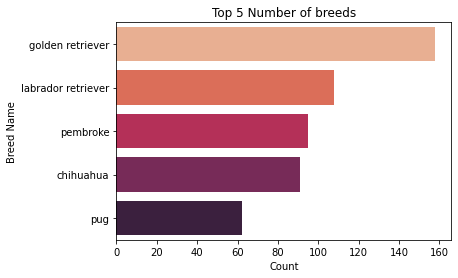

In [116]:
y = df_master['breed'].value_counts().iloc[:5]
x = y.index

sb.barplot(y,x,orient='h',palette='rocket_r');
plt.title("Top 5 Number of breeds")
plt.xlabel("Count")
plt.ylabel("Breed Name")

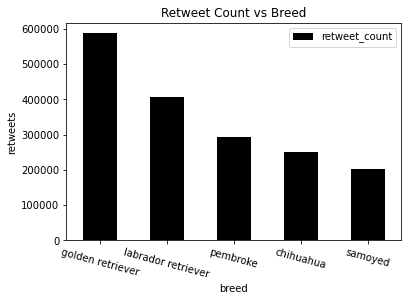

In [123]:
df_master[['breed','retweet_count']].groupby('breed',as_index=True).sum().sort_values(by='retweet_count',ascending=False).iloc[:5].plot(kind="bar",color=['black'])
plt.xticks(rotation=-15)
plt.legend()
plt.ylabel("retweets")
plt.xlabel("breed")
plt.title("Retweet Count vs Breed")
plt.show();

<h1>Conclusion</h1>

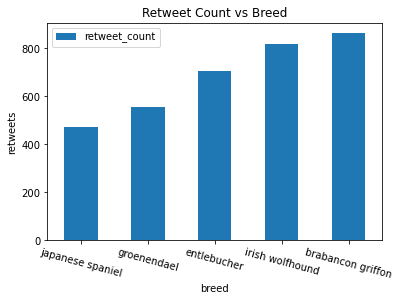

In [105]:
df_master[['breed','retweet_count']].groupby('breed',as_index=True).sum().sort_values(by='retweet_count',ascending=True).iloc[:5].plot(kind="bar")
plt.xticks(rotation=-15)
plt.legend()
plt.ylabel("retweets")
plt.xlabel("breed")
plt.title("Retweet Count vs Breed")
plt.show();

Text(0, 0.5, 'Posts')

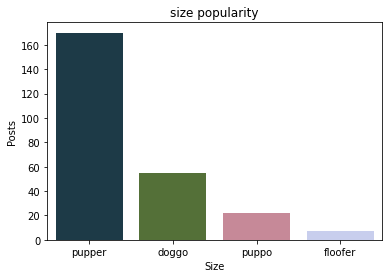

In [127]:
y = df_master['dog_class'].value_counts().iloc[:5]
x = y.index

sb.barplot(x,y,orient='v',palette='cubehelix');
plt.title("size popularity")
plt.xlabel("Size")
plt.ylabel("Posts")

Text(0, 0.5, 'Breed')

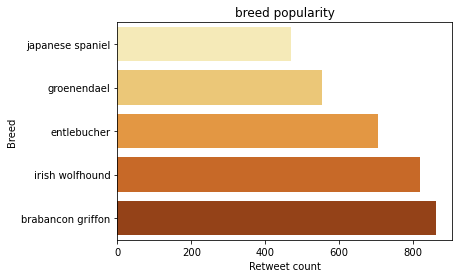

In [126]:
df_pop = df_master[['breed','retweet_count']].groupby('breed',as_index=False).sum().sort_values(by='retweet_count',ascending=True).iloc[:5]

df_pop

x = df_pop['breed']
y = df_pop['retweet_count']

sb.barplot(y,x,orient='h',palette='YlOrBr');
plt.title("breed popularity")
plt.xlabel("Retweet count")
plt.ylabel("Breed")

In [110]:
df_master.query('breed=="japanese spaniel"')

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,breed
1268,1331,677301033169788928,2015-12-17 01:35:24+00:00,Twitter for iPhone,This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,https://twitter.com/dog_rates/status/677301033169788928/photo/1,5,10,Juckson,NaN,471,1362,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,japanese spaniel
